In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Load data

In [7]:
data = pd.read_csv("Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Simple linear regression

In [20]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [51]:
x= pd.DataFrame(data['lstat'])
y=pd.DataFrame(data['medv'])

<AxesSubplot:xlabel='lstat', ylabel='medv'>

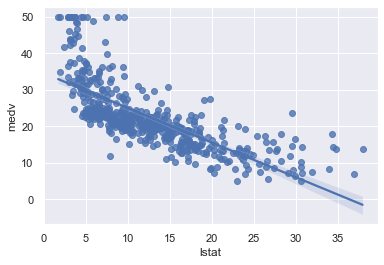

In [19]:
#ind = lstat, dep- medv

sns.regplot(data=data,x='lstat',y="medv")


In [52]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)
x_train
x_train.shape
y_train
y_train.shape
x_test.shape,y_test.shape

((102, 1), (102, 1))

In [53]:
#FIT THE MODEL
clf = LinearRegression()


In [54]:
clf.fit(x_train,y_train)

LinearRegression()

In [55]:
clf.intercept_


array([34.33497839])

In [56]:
clf.coef_

array([[-0.92441715]])

In [65]:
y_pred=pd.DataFrame(clf.predict(x_test),columns=['predicted'])
y_pred

,predicted
0,27.374117
1,27.697663
2,16.955936
3,26.847199
4,24.915168
...,...
97,26.791734
98,30.507891
99,22.317555
100,19.830873


In [69]:
#validation metrics
from sklearn import metrics

print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_absolute_percentage_error(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred)*100)

46.99482091954711
5.078127727696938
0.23194449522209046
52.44757432765152


In [70]:
#using statsmodel

result = sm.OLS(y_train, sm.add_constant(x_train)).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     490.4
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           1.31e-71
Time:                        17:42:00   Log-Likelihood:                -1299.3
No. Observations:                 404   AIC:                             2603.
Df Residuals:                     402   BIC:                             2611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.3350      0.612     56.064      0.000      33.131      35.539
lstat         -0.9244      0.042    -22.145      0.000      -1.006      -0.842
==============================================================================
Omnibus:                      114.606   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.311
Skew:                           1.459   Prob(JB):                     3.63e-56
Kurtosis:                       5.579   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""